# Sentiment Analysis

In [4]:
#import sys
#!conda install --yes --prefix {sys.prefix} textblob

In [5]:
from textblob import TextBlob

TextBlob("Imagine there's no heaven. it's easy if you try").sentiment

Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)

In [6]:
TextBlob("Too late, my time has come").sentiment

Sentiment(polarity=-0.3, subjectivity=0.6)

In [7]:
TextBlob("not good").sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [8]:
import pandas as pd

artists=['ABBA','David_Bowie','Janis_Joplin','Michael_Jackson','Queen','Rolling_Stones','The_Clash','Bob_Dylan','Elton_John','Led_Zeppeling','Pink_Floyd','Ramones','The_Beatles','The_Doors']

data = {}
for i, a in enumerate(artists):
    with open("lyrics_top50/" + a + ".txt", "r") as file:
        data[a] = file.read()
        
data_df = pd.DataFrame(data,index=[0]).transpose()
data_df.columns=['lyrics']
data_df

,lyrics
ABBA,"[Verse 1]\nI, I've been in love before\nI thou..."
David_Bowie,[Intro]\n\n[Verse 1]\nA small Jean Genie snuck...
Janis_Joplin,"[Intro]\nOh, come on, come on, come on, come o..."
Michael_Jackson,"[Verse 1]\nYour butt is mine, gonna tell you r..."
Queen,[Verse 1]\nI can dim the lights and sing you s...
Rolling_Stones,[Intro]\nWhat a drag it is getting old\n\n[Ver...
The_Clash,Stay around don't play around\nThis old town a...
Bob_Dylan,[Verse 1]\nGo away from my window\nLeave at yo...
Elton_John,[Verse 1]\nCan you hear it in the distance?\nC...
Led_Zeppeling,[Intro]\nHey\nThat's right\n\n[Verse 1]\nAsked...


In [9]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_df['polarity'] = data_df['lyrics'].apply(pol)
data_df['subjectivity'] = data_df['lyrics'].apply(sub)
data_df

,lyrics,polarity,subjectivity
ABBA,"[Verse 1]\nI, I've been in love before\nI thou...",0.115758,0.514527
David_Bowie,[Intro]\n\n[Verse 1]\nA small Jean Genie snuck...,0.073265,0.474530
Janis_Joplin,"[Intro]\nOh, come on, come on, come on, come o...",0.216069,0.516952
Michael_Jackson,"[Verse 1]\nYour butt is mine, gonna tell you r...",0.128611,0.509167
Queen,[Verse 1]\nI can dim the lights and sing you s...,0.134477,0.540202
Rolling_Stones,[Intro]\nWhat a drag it is getting old\n\n[Ver...,0.044148,0.514998
The_Clash,Stay around don't play around\nThis old town a...,0.053961,0.437761
Bob_Dylan,[Verse 1]\nGo away from my window\nLeave at yo...,0.055089,0.468441
Elton_John,[Verse 1]\nCan you hear it in the distance?\nC...,0.110339,0.486626
Led_Zeppeling,[Intro]\nHey\nThat's right\n\n[Verse 1]\nAsked...,0.153027,0.518535


In [10]:
data_df.index

Index(['ABBA', 'David_Bowie', 'Janis_Joplin', 'Michael_Jackson', 'Queen',
       'Rolling_Stones', 'The_Clash', 'Bob_Dylan', 'Elton_John',
       'Led_Zeppeling', 'Pink_Floyd', 'Ramones', 'The_Beatles', 'The_Doors'],
      dtype='object')

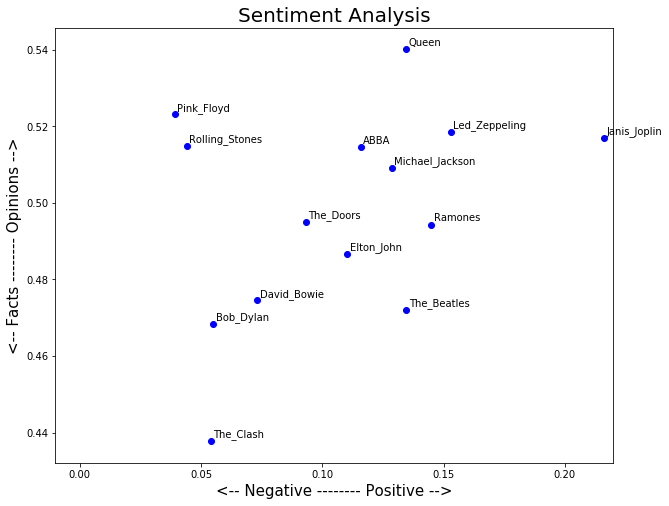

In [11]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, artist in enumerate(data_df.index):
    x = data_df.polarity.loc[artist]
    y = data_df.subjectivity.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_df.index[index], fontsize=10)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()